Import thư viện

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [22]:
# Thiết lập seed ngẫu nhiên
seed = 230101074  # Thay bằng MSHV của bạn
np.random.seed(seed)
random.seed(seed)

In [23]:
# Tạo dữ liệu
def generate_data(n_samples, std_dev=0.03):
    x = np.random.rand(n_samples)
    y = np.sin(1 + x**2) + np.random.normal(0, std_dev, n_samples)
    return pd.DataFrame({'x': x, 'y': y})

In [24]:
# Huấn luyện mô hình và đánh giá
def train_and_evaluate(degrees, train_data, test_data):
    results = []
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(train_data[['x']], train_data['y'])
        E_in = mean_squared_error(train_data['y'], model.predict(train_data[['x']]))
        E_out = mean_squared_error(test_data['y'], model.predict(test_data[['x']]))
        results.append({'Degree': degree, 'E_in': E_in, 'E_out': E_out})
    return pd.DataFrame(results)

In [25]:
# Vẽ đồ thị
def plot_models(models, train_data, test_data, ax):
    x_range = np.linspace(0, 1, 100)
    ax.plot(x_range, np.sin(1 + x_range**2), 'k', label='True function')
    ax.scatter(train_data['x'], train_data['y'], color='red', label='Train data')
    ax.scatter(test_data['x'], test_data['y'], color='green', label='Test data')
    for degree, model in enumerate(models):
        # Sửa đổi cách truyền input cho model.predict
        ax.plot(x_range, model.predict(pd.DataFrame({'x': x_range})), label=f'Degree {degree+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Polynomial Regression (N={len(train_data)})')
    ax.legend()


Results for N = 10, dataset 1:
| Degree   | E_in        | E_out       |
|:---------|:------------|:------------|
| 1        | 0.000944613 | 0.00630998  |
| 2        | 0.00091248  | 0.0025766   |
| 3        | 0.000561069 | 0.344187    |
| 4        | 0.00051113  | 0.18421     |
| 5        | 0.00030135  | 65.6411     |
| 6        | 0.000212177 | 299         |
| 7        | 6.66139e-05 | 334805      |
| 8        | 1.64567e-05 | 1.57822e+08 |
| 9        | 1.52177e-19 | 7.61304e+10 |

Results for N = 10, dataset 2:
| Degree   | E_in        | E_out       |
|:---------|:------------|:------------|
| 1        | 0.00129653  | 0.0012936   |
| 2        | 0.00106383  | 0.00111481  |
| 3        | 0.00079076  | 0.000656682 |
| 4        | 0.000790724 | 0.0006558   |
| 5        | 0.000407754 | 0.00227261  |
| 6        | 0.000407173 | 0.00240953  |
| 7        | 0.000387569 | 0.00256677  |
| 8        | 0.000162195 | 0.509562    |
| 9        | 2.46708e-19 | 17874.1     |

Results for N = 10, dataset 3:
| 

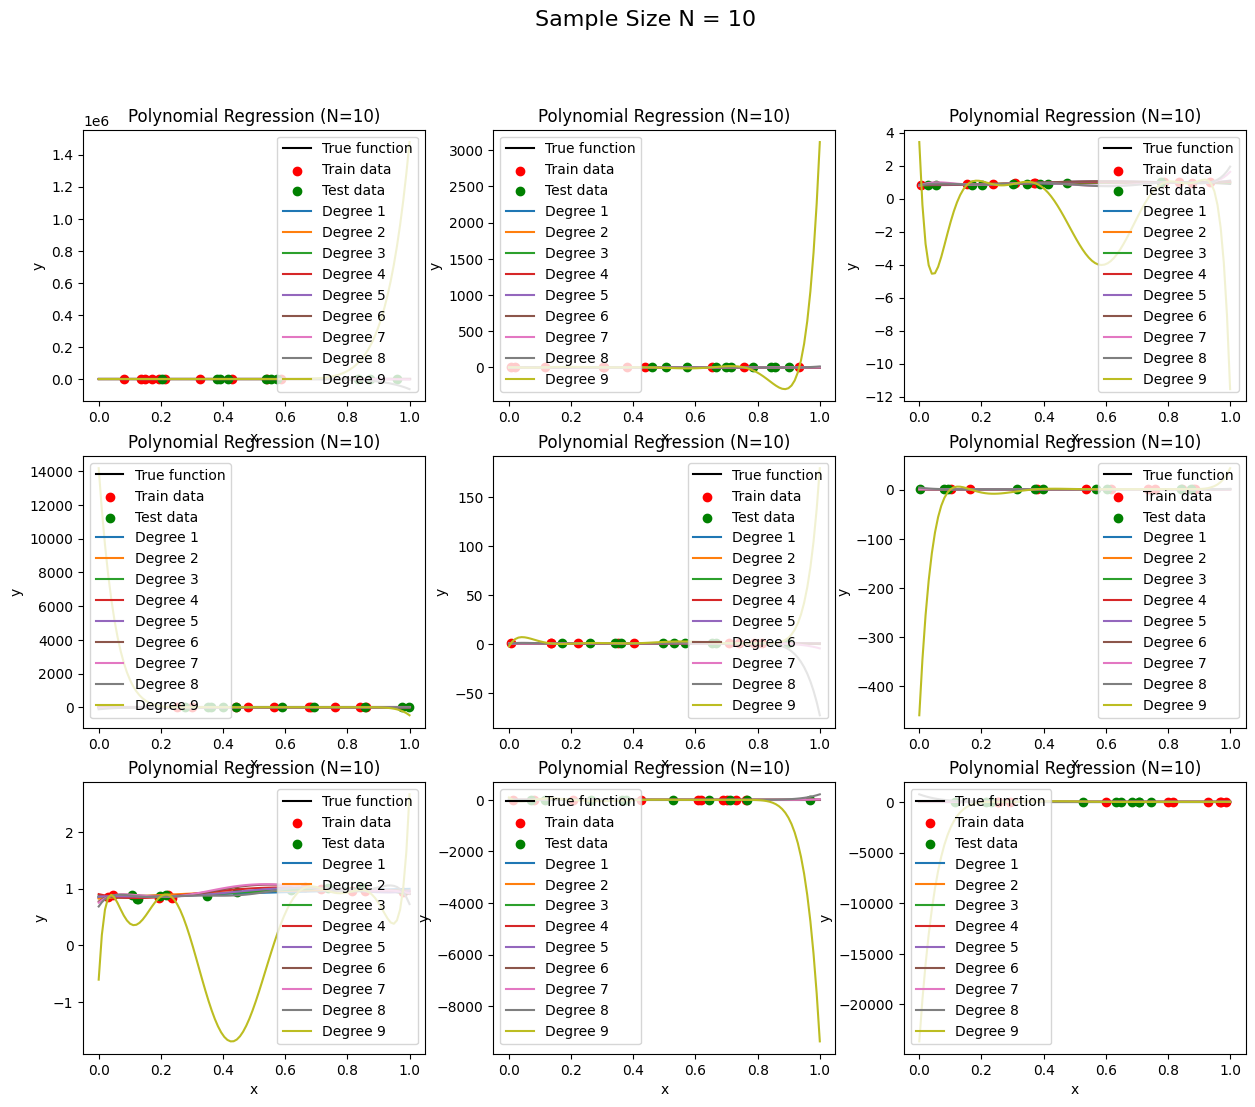

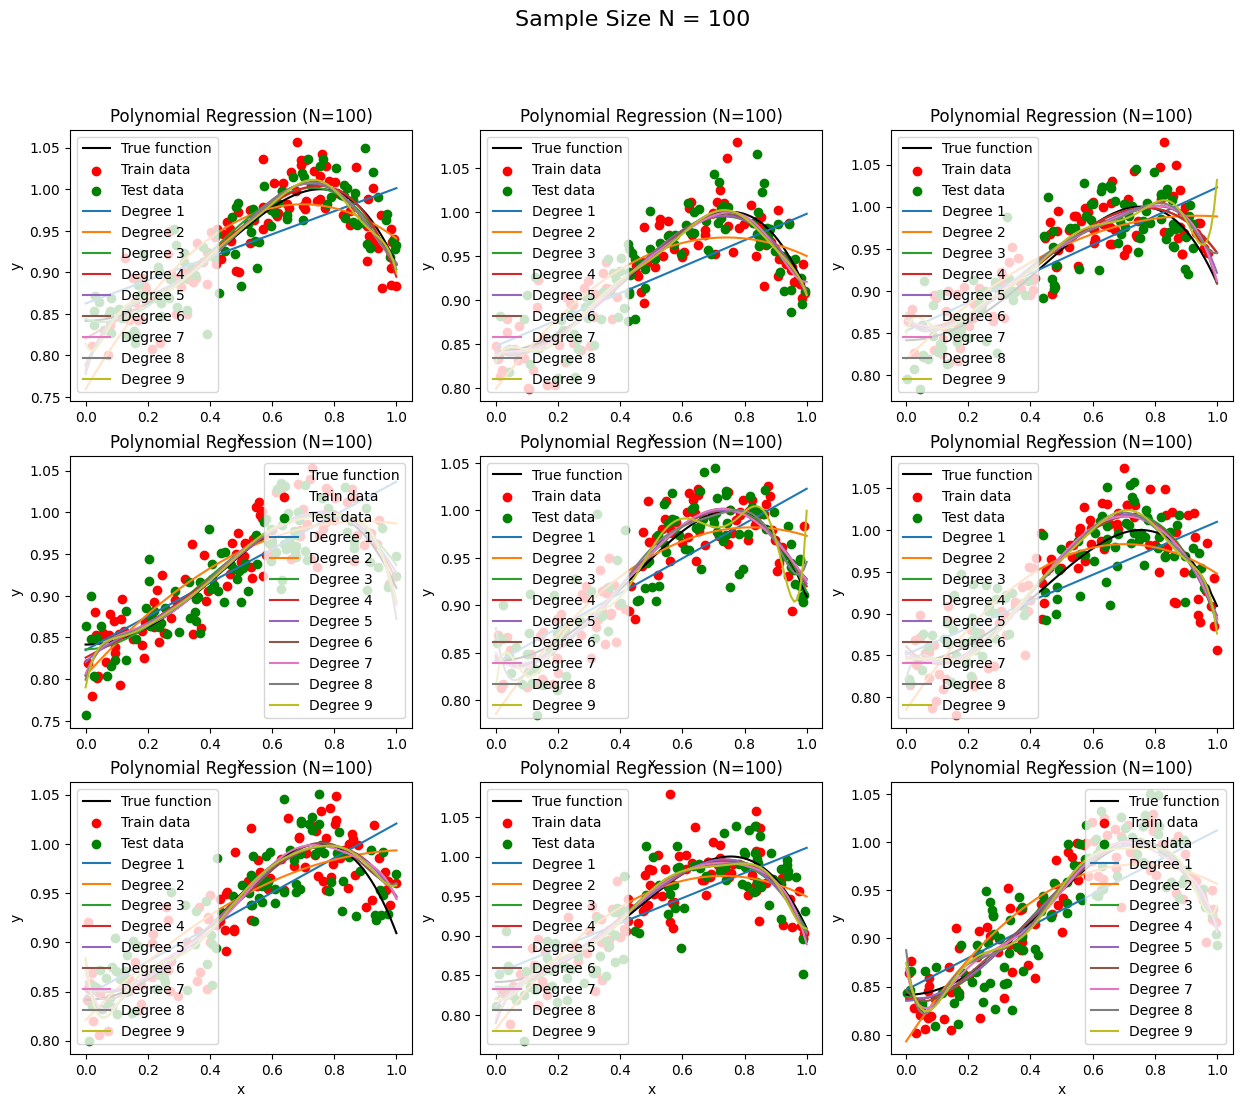

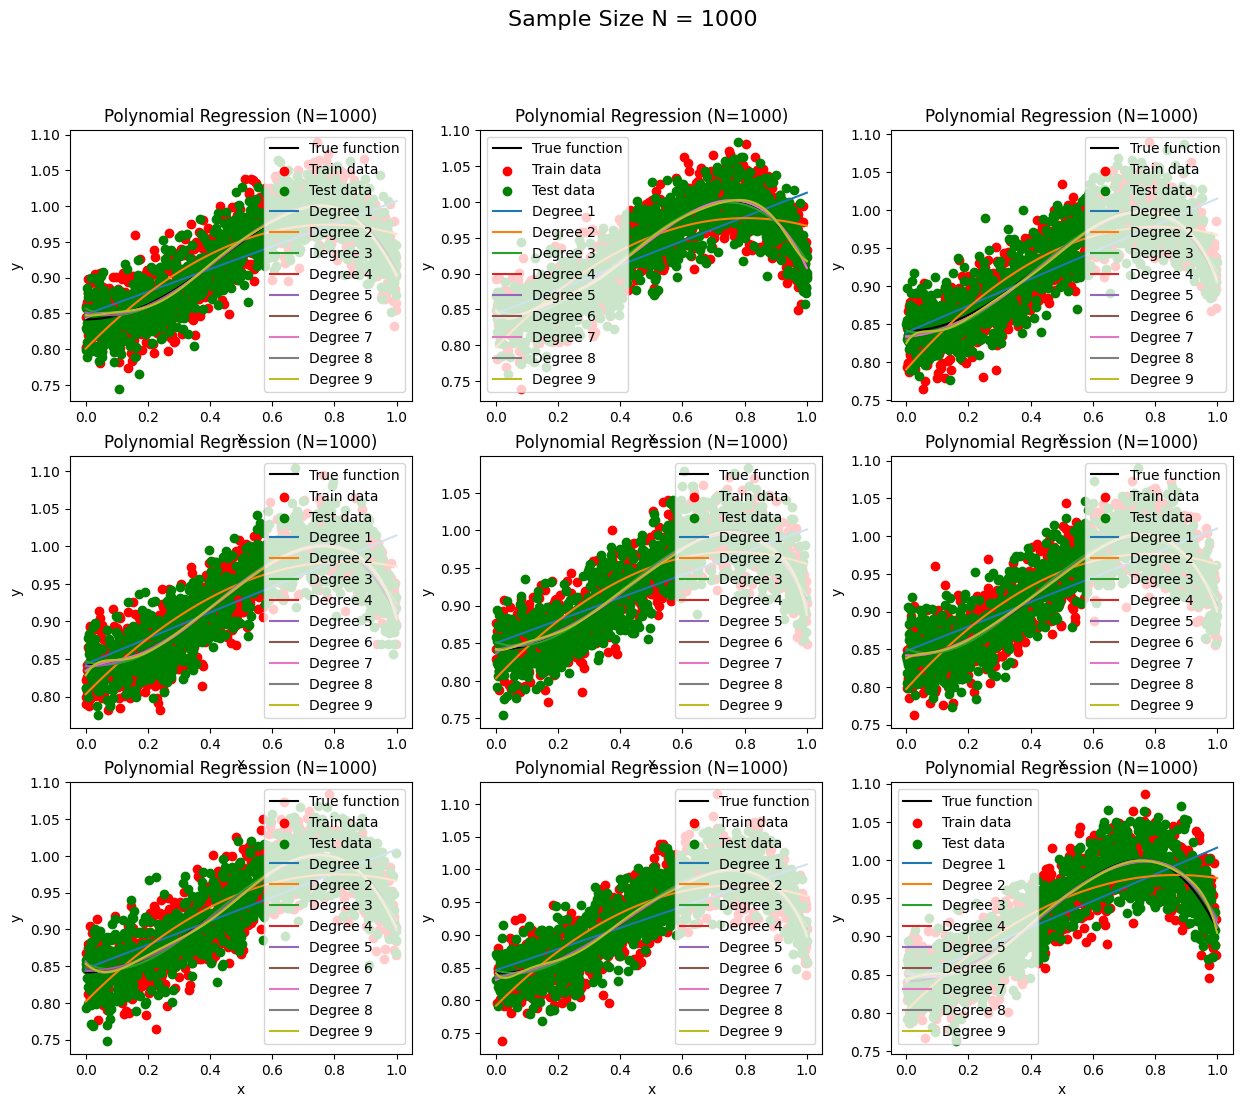

In [29]:
# Thực hiện phân tích
degrees = list(range(1, 10))
sample_sizes = [10, 100, 1000]

for n_samples in sample_sizes:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle(f'Sample Size N = {n_samples}', fontsize=16)  # Thêm tiêu đề cho hình
    for i in range(9):
        D_train = generate_data(n_samples)
        D_test = generate_data(n_samples)
        results = train_and_evaluate(degrees, D_train, D_test)
        print(f"\nResults for N = {n_samples}, dataset {i+1}:")
        print(results.to_markdown(index=False, numalign="left", stralign="left"))

        models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(D_train[['x']], D_train['y']) for degree in degrees]
        plot_models(models, D_train, D_test, axes[i // 3, i % 3])
plt.show()  # Hiển thị tất cả các hình cùng lúc

Nhận xét:

1.   Bias và Variance với tập dữ liệu nhỏ (N=10):
*   Mô hình bậc thấp (1-2): Có bias cao (đường dự đoán không khớp với đường thực tế) và variance thấp (các đường dự đoán trong 3 bộ dữ liệu gần giống nhau).
*   Mô hình bậc trung bình (3-5): Có sự cân bằng tốt hơn giữa bias và variance.
*   Mô hình bậc cao (6-9): Có bias thấp (đường dự đoán khớp rất tốt với dữ liệu train) nhưng variance cao (các đường dự đoán trong 3 bộ dữ liệu rất khác nhau, đặc biệt là mô hình bậc 9).
*   Mô hình bậc 9 thể hiện rõ overfitting (khớp quá mức với tập huấn luyện).
2.   Bias và Variance với tập dữ liệu lớn (N=100, 1000):
*   Mô hình bậc thấp (1-2): Vẫn có bias cao nhưng variance giảm đi so với trường hợp N=10.
*   Mô hình bậc trung bình (3-5): Vẫn là lựa chọn tốt nhất với sự cân bằng giữa bias và variance.
*   Mô hình bậc cao (6-9): Variance giảm đi đáng kể so với trường hợp N=10, tuy nhiên overfitting vẫn xảy ra, đặc biệt ở mô hình bậc 9.



Kết luận về ảnh hưởng của kích thước tập train:

1.   Tăng kích thước tập train có thể giảm bias của mô hình hay không?
Không. Bias liên quan đến khả năng của lớp mô hình (ví dụ: mô hình tuyến tính, mô hình đa thức bậc 2,...) trong việc xấp xỉ hàm mục tiêu thực tế. Việc tăng kích thước tập train không làm thay đổi lớp mô hình nên không ảnh hưởng đến bias.
2.   Tăng kích thước tập train có thể giảm variance của mô hình hay không?
Có. Variance là sự biến thiên của mô hình khi được huấn luyện trên các tập dữ liệu khác nhau. Khi tăng kích thước tập train, mô hình có nhiều thông tin hơn để học và ít bị ảnh hưởng bởi các điểm dữ liệu ngẫu nhiên, từ đó variance giảm. Điều này thể hiện rõ qua việc các đường dự đoán trong 3 bộ dữ liệu trở nên gần giống nhau hơn khi tăng N từ 10 lên 100 và 1000.

